In [9]:
import numpy as np
from keras.layers import Dense, Dropout, Input, Activation
from keras.models import Model, Sequential, load_model
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import sklearn
from sklearn import svm
import pandas as pd

In [3]:
df=read_csv("drive/MyDrive/iisc_data/Exp_consolidated.csv")
xtrain=df[['Feed', 'Speed', 'DoC', 'WoC', 'Dir', 'Coolant', 'Toolwear']]
ytrain=df[['Ra']]
xtrain=np.array(xtrain)
ytrain=np.array(ytrain)

In [4]:
print(xtrain.shape)
print(ytrain.shape)

(64, 7)
(64, 1)


In [5]:
df=read_csv("drive/MyDrive/iisc_data/Test_consolidated.csv")
xtest=df[['Feed', 'Speed', 'DoC', 'WoC', 'Dir', 'Coolant', 'Toolwear']]
ytest=df[['Ra']]
xtest=np.array(xtest)
ytest=np.array(ytest)

In [6]:
print(xtest.shape)
print(ytest.shape)

(16, 7)
(16, 1)


In [7]:
# Defining Parameters
C_arr = [0.1,1,10,100,1000]
eps_arr = [1,0.1,0.01,0.001,0.0001,0.00001]

In [13]:
# Hyper tuning SVR Model

hyper_arr = []
hyper_cols =  ['c','epsilon','mae', 'mse']
for C in C_arr:
    for epsilon in eps_arr:
        model = svm.SVR(kernel='rbf', C=C, epsilon=epsilon)
        svr = model.fit(xtrain, ytrain)
        yhat = model.predict(xtest)
        yhat = yhat.reshape((yhat.shape[0], 1))
        mae = mean_absolute_error(ytest, yhat)
        mse = mean_squared_error(ytest, yhat)

        # corr = stats.pearsonr(Y_test,Y_pred)[0]


        hyper_arr.append([C,epsilon,mae, mse])

hyper_df = pd.DataFrame(hyper_arr,columns= hyper_cols)
hyper_df = hyper_df.sort_values(by=['mse'], ascending=True)
hyper_df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

,c,epsilon,mae,mse
26,1000.0,0.01000,0.943148,1.198832
27,1000.0,0.00100,0.943088,1.200389
28,1000.0,0.00010,0.943374,1.200669
29,1000.0,0.00001,0.943412,1.200712
23,100.0,0.00001,0.946621,1.217334
22,100.0,0.00010,0.946723,1.217632
21,100.0,0.00100,0.947078,1.218292
24,1000.0,1.00000,0.988858,1.227927
20,100.0,0.01000,0.951525,1.228114
25,1000.0,0.10000,0.964621,1.233890


In [15]:
# Building SVR model with best parameters

model_svr = svm.SVR(kernel='rbf', C=1000, epsilon=0.01) # set kernel and hyperparameters
svr = model_svr.fit(xtrain, ytrain)
yhat = model_svr.predict(xtest)
yhat = yhat.reshape((yhat.shape[0], 1))
mae = mean_absolute_error(ytest, yhat)
mse = mean_squared_error(ytest, yhat)

print(mae)
print(mse)

# print(yhat)
# print(ytest)

0.9431477450370926
1.198831652187586


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


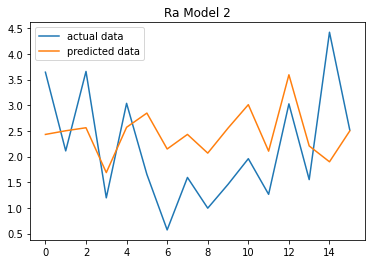

In [16]:
import matplotlib.pyplot as plt

plt.plot(ytest[:], label="actual data")
plt.plot(yhat[:], label="predicted data")
plt.title("Ra Model 2")
plt.legend()
plt.show()

In [17]:
import pickle
pickle.dump(model, open('drive/MyDrive/iisc_data/mode_1Ra_1.pkl', 'wb'))